In [3]:
import glob
import natsort
import numpy as np
import matplotlib.pyplot as plt
# Load all files inside the folder 'Samples'
files = glob.glob('Samples3_19-5/*')

# Display the list of files
# Sort the list of
# files naturally
files = natsort.natsorted(files)


In [5]:
Wuv,Wb,Wc=[],[],[]

for run in files:
    data=np.transpose(np.load(run))

    if np.sum(data[0] < 5) > 1500:
        continue

    #plt.hist(data[0], bins=100, alpha=0.5, label='Wuv')
    #plt.show()
    #plt.hist(data[1], bins=100, alpha=0.5, label='Wb')
    #plt.show()

    Wuv.append(data[0])
    Wb.append(data[1])
    Wc.append(data[2])

Wuv = np.concatenate(Wuv).ravel().tolist()
Wb = np.concatenate(Wb).ravel().tolist()
Wc = np.concatenate(Wc).ravel().tolist()
Wuv=np.array(Wuv)   
Wb=np.array(Wb)
Wc=np.array(Wc)


np.random.seed(42)  # For reproducibility
random_mask = np.random.choice([True,False,False, False], size=Wuv.shape)
Wuv = Wuv[random_mask]
Wb = Wb[random_mask]
Wc = Wc[random_mask]



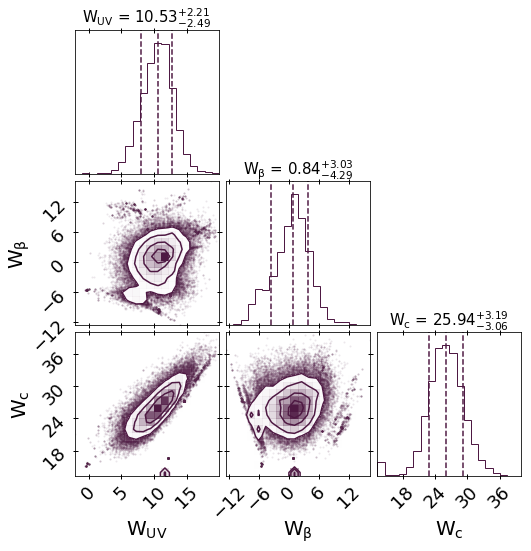

In [6]:
import corner
import seaborn as sns
from palettable import cmocean

cmap=cmocean.sequential.Matter_3_r.mpl_colormap

# Combine Wuv, Wb, and Wc into a single array
data_combined = np.vstack((Wuv,Wb, Wc)).T
labels = [r"W$_{\mathrm{UV}}$",r"W$_{\mathrm{\beta}}$",r"W$_{\mathrm{c}}$"]
# Create the corner plot
fig = corner.corner(data_combined, labels=labels,quantiles=[.16,.50,.84],label_kwargs={"fontsize": 20},color=cmap(0.1), show_titles=True, title_kwargs={"fontsize": 15})
ndim=len(labels)
axes = np.array(fig.axes).reshape((ndim, ndim))
for i in range(ndim):
    for j in range(ndim):
        ax = axes[i, j]
        ax.tick_params(axis='both', direction='inout', length=5, width=1., which='both', top=True, right=True, labelsize=18)


plt.savefig("CornerPlot.png",dpi=300,bbox_inches='tight')
plt.show()


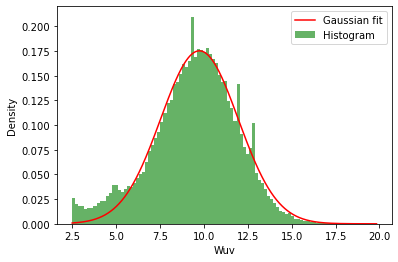

Mean: 9.7464219930614, Std: 2.2072364591213205


In [36]:
from scipy.optimize import curve_fit

# Histogram of Wuv
hist_Wuv, bin_edges_Wuv = np.histogram(Wuv, bins=100, density=True)
bin_centers_Wuv = (bin_edges_Wuv[:-1] + bin_edges_Wuv[1:]) / 2

# Gaussian function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Fit the Gaussian
initial_guess_Wuv = [1, np.mean(Wuv), np.std(Wuv)]
popt_Wuv, _ = curve_fit(gaussian, bin_centers_Wuv, hist_Wuv, p0=initial_guess_Wuv)

# Plot histogram and Gaussian fit
plt.hist(Wuv, bins=100, density=True, alpha=0.6, color='g', label='Histogram')
x_fit_Wuv = np.linspace(min(Wuv), max(Wuv), 1000)
plt.plot(x_fit_Wuv, gaussian(x_fit_Wuv, *popt_Wuv), 'r-', label='Gaussian fit')
plt.xlabel('Wuv')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print mean and std
mean_Wuv, std_Wuv = popt_Wuv[1], popt_Wuv[2]
print(f"Mean: {mean_Wuv}, Std: {std_Wuv}")

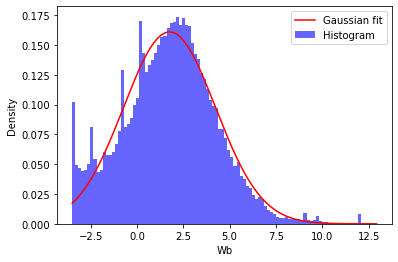

Mean: 1.754283251035033, Std: 2.4834775428687594


In [41]:
# Histogram of Wb
hist_Wb, bin_edges_Wb = np.histogram(Wb, bins=100, density=True)
bin_centers_Wb = (bin_edges_Wb[:-1] + bin_edges_Wb[1:]) / 2

# Fit the Gaussian
initial_guess_Wb = [1, np.mean(Wb), np.std(Wb)]
popt_Wb, _ = curve_fit(gaussian, bin_centers_Wb, hist_Wb, p0=initial_guess_Wb)

# Plot histogram and Gaussian fit
plt.hist(Wb, bins=100, density=True, alpha=0.6, color='b', label='Histogram')
x_fit_Wb = np.linspace(min(Wb), max(Wb), 1000)
plt.plot(x_fit_Wb, gaussian(x_fit_Wb, *popt_Wb), 'r-', label='Gaussian fit')
plt.xlabel('Wb')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print mean and std
mean_Wb, std_Wb = popt_Wb[1], popt_Wb[2]
print(f"Mean: {mean_Wb}, Std: {std_Wb}")